<a href="https://colab.research.google.com/github/pepetellez/BEDU-Data-Analysis/blob/main/Analisis-de-Datos-con-Python/7_Pruebas_A_B_y_Procesamiento_de_Lenguaje_Natural/s7_r4_nltk_freq_dist_y_visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 4: Nltk FreqDist y Visualizaciones de NLP

### 1. Objetivos:
    - Aprender a realizar análisis estadístico de datos no estructurados utilizando FreqDist
    - Utilizar seaborn para visualizar los análisis estadísticos que visualicemos
 
---
    
### 2. Desarrollo:

Vamos a utilizar el objeto `FreqDist` para hacer análisis estadístico de las mismas evaluaciones que has utilizado en los últimos Retos. Intercalaremos análisis puramente numérico con visualizaciones realizadas con `seaborn` y `matplotlib` para hacer más claros nuestros hallazgos.

Tu Reto consiste en lo siguiente:

1. Tokeniza las evaluaciones y crea una sola lista que contenga todas las palabras en nuestro conjunto de datos.
2. Utiliza el objeto `stopwords` encontrado en la librería `nltk.corpus` para filtrar todas las palabras vacías de tu conjunto de datos y solamente tener palabras relevantes.
3. Crea un objeto `Text` con tu dataset resultante.
4. Crea también un objeto `FreqDist` con el mismo dataset.
5. Obtén las 20 palabras más comunes en el dataset y realiza una gráfica de barras 'verticales' para visualizar su frecuencia.
6. Obtén las 50 palabras más comunes en el dataset y realiza una gráfica de barras 'horizontales' para visualizar su frecuencia.
7. Obtén los 20 bigramas más frecuentes en el dataset y realiza una gráfica de barras 'verticales' para visualizar tu frecuencia.
8. Obtén una lista de las palabras que tengan 10 o más caracteres que aparezcan por lo menos 7 veces en el dataset.
9. Realiza un histograma del número de palabras contenidas en cada evaluación.
10. Genera una nube de palabras con tu dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.util import ngrams
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/amazon_fine_food_reviews-clean.csv", index_col=0)
df.head()

,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,summary,text
id,,,,,,,,,
258510,B00168V34W,A1672LH9S1XO70,"Lorna J. Loomis ""Canadian Dog Fancier""",13,14,3,1266796800,"Misleading to refer to ""PODS""","This coffee does NOT come in individual ""PODS""..."
207915,B000CQID2Y,A42CJC66XO0H7,"Scott Schimmel ""A Butterfly Dreaming""",2,2,5,1279497600,Delicious,I was a little skeptical after looking at the ...
522649,B007TJGZ0Y,A16QZBG2UN6Z3X,"Toology ""Toology""",0,0,5,1335830400,One of my favs,Gloia Jeans Butter Toffee is one of my favorit...
393368,B000W7PUOW,A3J21CQZG60K35,Hsieh Pei Hsuan,2,2,5,1265673600,Tasty!!,My families and friends love Planters peanuts ...
178178,B002FX2IOQ,A1Z7XV6JU0EV8M,"Barbara ""Barbara""",1,6,1,1301788800,"Organic Valley White 1 % Milkfat Lowfat Milk, ...","Organic Valley White 1 % Milkfat Lowfat Milk, ..."


In [44]:
grouped_by_title = df.groupby('product_id')['text'].max()

grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('br', '')
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

tokenized = grouped_by_title.apply(nltk.word_tokenize)
all_words = tokenized.sum()

english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


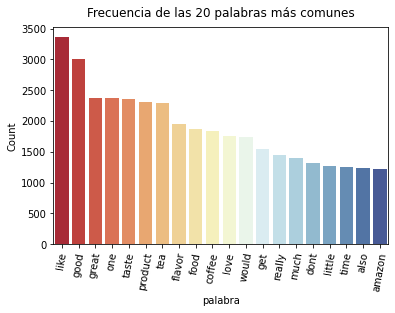

In [45]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

df_top_20 = pd.DataFrame()
df_top_20["palabra"] = most_common_20[:, 0]
df_top_20["conteo"] = most_common_20[:, 1]
df_top_20["conteo"] = pd.to_numeric(df_top_20["conteo"])

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(df_top_20["palabra"], df_top_20["conteo"], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


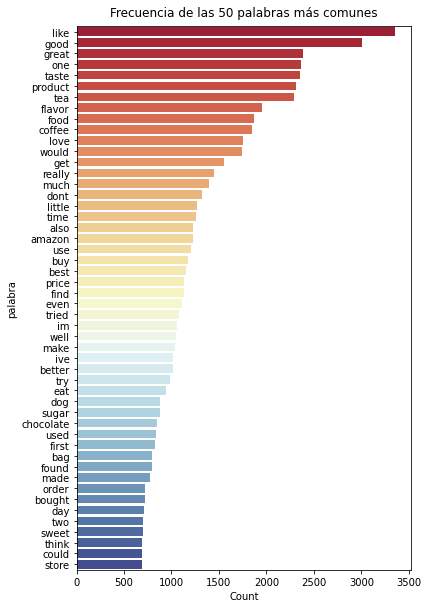

In [47]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist.most_common(50))))

df_top_50 = pd.DataFrame()
df_top_50["palabra"] = most_common_50[:, 0]
df_top_50["conteo"] = most_common_50[:, 1]
df_top_50["conteo"] = pd.to_numeric(df_top_50["conteo"])

fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot()

sns.barplot(df_top_50["conteo"], df_top_50["palabra"], ax=ax, palette='RdYlBu', orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


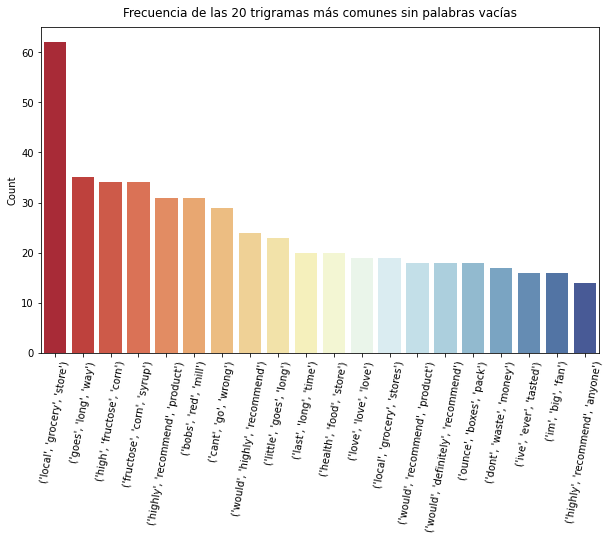

In [50]:
text = nltk.Text(all_words_except_stop_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

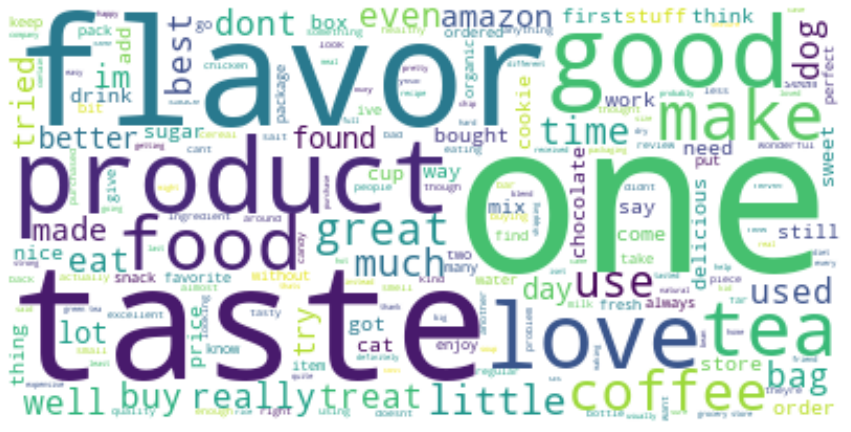

In [57]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()